<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [24]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [12]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df=pd.read_csv("Sacramento_transactions.csv")
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [13]:
df.shape

(985, 12)

In [14]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [15]:
#Removing the "0" from the min valve of the df
df.drop(df.index[df['sq__ft'] == 0], inplace=True)

In [16]:
df.isnull().sum() # Checking if there are any NaN in any of the columns in dataset seems there are none.

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     814 non-null    object 
 1   city       814 non-null    object 
 2   zip        814 non-null    int64  
 3   state      814 non-null    object 
 4   beds       814 non-null    int64  
 5   baths      814 non-null    int64  
 6   sq__ft     814 non-null    int64  
 7   type       814 non-null    object 
 8   sale_date  814 non-null    object 
 9   price      814 non-null    int64  
 10  latitude   814 non-null    float64
 11  longitude  814 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [22]:
df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

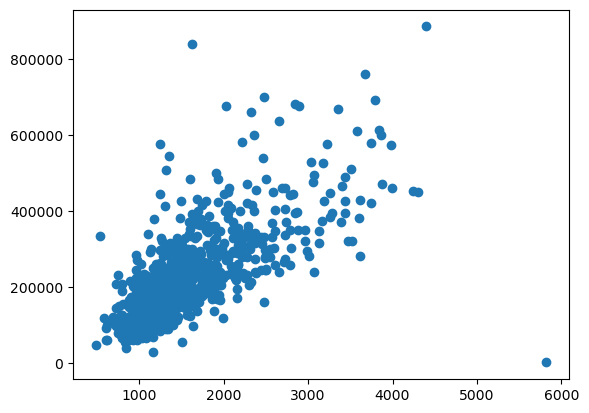

In [25]:
plt.scatter(x=df['sq__ft'], y=df['price'])

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

# ANSWER
**The target variable is the variable whose values are modeled and predicted by other variables. A predictor variable is a variable whose values will be used to predict the value of the target variable.**


#### 2.2 List all possible variables which might be Independent/Predictor variable.

# ANSWER
**Independent variable= street, city, zip, state, type, sale_date, sq__ft, lattitude and longitude**

**Predictor variable= beds, bath, price**




#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [26]:
# ANSWER
my_corr=df[['beds', 'baths', 'sq__ft', 'price']].copy()
my_corr.corr()

,beds,baths,sq__ft,price
beds,1.000000,0.654746,0.695710,0.441988
baths,0.654746,1.000000,0.724631,0.501820
sq__ft,0.695710,0.724631,1.000000,0.693708
price,0.441988,0.501820,0.693708,1.000000


The best predictor i belive is sq__ft because it is having the closest value to 1 having the higher correlation.

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [28]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [31]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
y = df['price']
lr= LinearRegression().fit(X,y)
lr

LinearRegression()

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [33]:
# ANSWER
r_square= lr.score(X,y)
print(r_square)

0.4812307133326901


### 3. Splitting Data

In [34]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [37]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#### 3.2 Check Shape, Sample of Test Train Data

In [50]:
# ANSWER
## Check training/test data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
#Samples of Subsets
print("Training set sample:")
print(X_train)
print(y_train)
print("Training set sample:")
print(X_test)
print(y_test)

Training set shape: (545, 1) (545,)
Testing set shape: (269, 1) (269,)
Training set sample:
[[2555]
 [2484]
 [ 588]
 [1566]
 [ 881]
 [2235]
 [1130]
 [1697]
 [ 932]
 [1915]
 [1260]
 [1183]
 [1179]
 [ 864]
 [1315]
 [1713]
 [1200]
 [ 972]
 [1354]
 [1394]
 [1512]
 [1266]
 [1695]
 [1451]
 [1051]
 [1440]
 [1882]
 [1161]
 [1590]
 [1164]
 [1650]
 [3009]
 [2800]
 [2214]
 [1326]
 [1639]
 [2508]
 [1685]
 [1488]
 [1859]
 [ 904]
 [ 832]
 [1011]
 [1289]
 [2280]
 [1043]
 [1056]
 [1110]
 [ 956]
 [1828]
 [1176]
 [1202]
 [1483]
 [1103]
 [ 994]
 [1436]
 [1529]
 [2205]
 [1265]
 [3056]
 [1134]
 [ 852]
 [1370]
 [1981]
 [2096]
 [1555]
 [1158]
 [2660]
 [1830]
 [1009]
 [1204]
 [ 804]
 [1683]
 [1146]
 [1527]
 [1240]
 [1475]
 [1206]
 [1262]
 [1319]
 [2606]
 [1245]
 [2577]
 [1829]
 [1595]
 [1843]
 [1324]
 [1436]
 [1219]
 [1929]
 [1117]
 [2457]
 [1000]
 [1337]
 [1596]
 [1040]
 [1712]
 [1247]
 [2162]
 [1118]
 [1104]
 [3260]
 [2170]
 [ 958]
 [2787]
 [3516]
 [3134]
 [2258]
 [2846]
 [1567]
 [ 836]
 [1358]
 [1019]
 [10

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [52]:
# ANSWER
reg= LinearRegression().fit(X_train, y_train)

In [53]:
# ANSWER
score=reg.score(X_test, y_test)
print('score:',score)

score: 0.44917703281062393


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [59]:
# ANSWER
X=df[['beds', 'baths', 'sq__ft']]
y=df['price']
#fit with linear regression model
reg= LinearRegression().fit(X, y)
house={'beds':3, 'baths':2, 'sq__ft':124}
r_house=pd.DataFrame([house])
predicted_price= reg.predict(r_house)
print('predicted price: $', predicted_price[0])

predicted price: $ 37896.83151266089


#### Find the error

In [67]:
# Predict price from X_test
from sklearn.metrics import mean_squared_error
reg= LinearRegression().fit(X_train, y_train)
predict= reg.predict(X_test)
mse=mean_squared_error(y_test, predict)
print('mean square error :', mse)

mean square error : 6873464361.755377




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



